Árvore de Decisão

Inicialmente são carregadas as bibliotecas necessárias: 

+ pandas (https://pandas.pydata.org/): biblioteca para análise de dados em python
+ scikit-learn (https://scikit-learn.org/stable/): biblioteca de ferramentas de aprendizagem de máquina em python

In [1283]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import *
from sklearn.model_selection import KFold, cross_val_score

# Importando o dataset

In [1284]:
# Nome dos atributos
col_names = ['Clima','Temperatura','Umidade','Vento','JogarTenis']

# carregando a base de dados a ser usada
exemplo = pd.read_csv("exemplo_IA.csv", header=None, names=col_names)

In [1285]:
# podemos ver os primeiros elementos do arquivo
exemplo.head()

,Clima,Temperatura,Umidade,Vento,JogarTenis
0,Ensolarado,Quente,Alta,Fraco,Nao
1,Ensolarado,Quente,Alta,Forte,Nao
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvendo,Moderado,Alta,Fraco,Sim
4,Chuvendo,Frio,Normal,Fraco,Sim


# Dividindo o dataset

Os dados do nosso exemplo são categóricos e o classificador de árvore de decisão do scikit não funciona para este tipo de dado. Precisamos preparar os dados antes construir nosso classificador. Para isso vamos usar a função do pandas "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1.
Por exemplo, o atributo Humidity que pode receber os valores High e Normal, passa a ser representado pelos atributos Humidity_High e Humidity_Normal, que podem receber os valores 0 e 1.

In [1286]:
# definir o conceito alvo e as features usadas
feature_cols = ['Clima','Temperatura','Umidade','Vento'] # features (atributos) que serão usadas no aprendizado

X = pd.get_dummies(exemplo[feature_cols]) # selecionamos as colunas correspondentes aos atributos que serão usados e converteno em uma tabela binaria
y = exemplo.JogarTenis # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias
train =  0.4
test = 1 - train
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = train, test_size = test, shuffle=True)


Dividiremos os dados da seguinte forma: 80% dos dados serão utilizados para treino e 20% para teste. Os dados de treino serão então separados e guardados em duas variáveis: o X_train guarda os valores das linhas 0 até a 10 e o y_train guarda os valores de saída correspondente a cada linha do X_train. A divisão acontecerá da mesma forma entre o X_test e o y_test para os dados de treino

Independente da % do treino, sempre que formos calcular a acurácia do treino, sempre será de 100%, pois ja treinamos com esses dados, logo ao realizamos a tentativa de classificação, saberemos qual é a resposta.

Ao aumentamos a % do treinamento e ultilzamos o metodo Holdout, teremos uma acuracia melhor, pois estamos treinando dados fixos, e agora deixamos menos dados para teste( ou para errar), logo maior a chance de sucesso, tendo uma acuracia alta.
Ao aumentarmos o numero de testes, consequetentemento diminuindo o de treinamento, temos uma acuracia tanto geral quanto do testes menor, pois agora nao tivemos muito dados para treinar(pelo menos para esse modelo de 14 instancias, para modelos grande esse acuracia pode aumentar ou diminuir), logo nossas chances de erro aumentam e assim errando na hora de classificar os dados testes.

#   Treinar o algoritmo

Vamos utilizar a função DecisionTreeClassifier para modelar. O parâmetro criterion define a função utilizada para medir a qualidade da divisão. No nosso caso definimos o critério com 'entropy'.

In [1287]:
# Criação do classificador de árvore de decisão 
modelo = DecisionTreeClassifier(criterion="entropy")
# modelo = DecisionTreeClassifier(criterion="gini")
# Agora iremos treinar o nosso modelo, utilizando a função fit do sklearn, usaremos os conjuntos de dados de treino que tínhamos preparados anteriormente.
modelo = modelo.fit(X_train, y_train)



# Gerando árvore

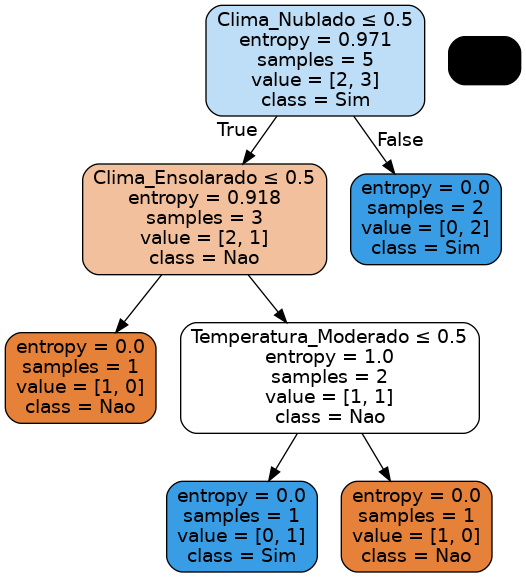

In [1288]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['Nao','Sim'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente. Observe que usamos todas as instâncias disponíveis no treinamento. A acurácia obtida foi 1, indicando que classificamos corretamente todos os exemplos de nosso conjunto.

# Fazer uma predição e avaliar o algoritmo

Vamos agora utilizar o nosso modelo para efetuar uma predição sobre o nosso dataset. Usaremos a função predict do sklearn e o nosso conjunto de dados X_test.

É natural querermos saber quão bom é o desempenho do modelo que desenvolvemos sobre o dataset. Para calcular a acurácia podemos utilizar a função score do sklearn.tree.

In [1289]:
# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Treinamento: {:.2f}% Teste: {:.2f}%".format(train*100, test*100))
print("Acurácia teste: {:.2f}%".format(modelo.score(X_test, y_test)*100))
print("Acurácia treinamento: {:.2f}%".format(modelo.score(X_train, y_train)*100))
print("Acurácia total: {:.2f}%".format(modelo.score(X, y)*100))

Treinamento: 40.00% Teste: 60.00%
Acurácia teste: 33.33%
Acurácia treinamento: 100.00%
Acurácia total: 57.14%


# Avaliar o algortimo utilizando o K-fold Cross Validation

Podemos também usar o método da validação cruzada com k-fold para avaliar o nosso algoritmo. Iremos utilizar as funções KFold e cross_val_score, ambas terão de ser importadas da biblioteca sklearn.model_selection.

Para todos os experimentos, o retorno da função cross_val_score é a acurácia dos testes, pois o retorno do treinamento é inrelevante, sempre será 1.

In [1303]:
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
           
modelo = DecisionTreeClassifier(criterion="entropy")
k_list = [3,8,14]
for k  in k_list:
    k_fold = KFold(n_splits=k)
    acuracias = cross_val_score(modelo, X, y, cv=k_fold) 
    print("-"*15,"K-fold: {}".format(k),"-"*15)
    for idx, acuracia in enumerate(acuracias):
        print("Experimento[{}]: {:.2f}%".format(idx+1, acuracia*100))

    print("\nMedia total: {:.2f}%\n".format(acuracias.mean()*100))


--------------- K-fold: 3 ---------------
Experimento[1]: 80.00%
Experimento[2]: 80.00%
Experimento[3]: 75.00%

Media total: 78.33%

--------------- K-fold: 8 ---------------
Experimento[1]: 50.00%
Experimento[2]: 50.00%
Experimento[3]: 50.00%
Experimento[4]: 50.00%
Experimento[5]: 100.00%
Experimento[6]: 50.00%
Experimento[7]: 100.00%
Experimento[8]: 0.00%

Media total: 56.25%

--------------- K-fold: 14 ---------------
Experimento[1]: 100.00%
Experimento[2]: 100.00%
Experimento[3]: 100.00%
Experimento[4]: 0.00%
Experimento[5]: 0.00%
Experimento[6]: 0.00%
Experimento[7]: 100.00%
Experimento[8]: 0.00%
Experimento[9]: 100.00%
Experimento[10]: 100.00%
Experimento[11]: 0.00%
Experimento[12]: 0.00%
Experimento[13]: 100.00%
Experimento[14]: 0.00%

Media total: 50.00%

